In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
from Linear_hashing import Linear_hashing

In [2]:
P = [1,5,10,20,50]
alpha_max_values = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [3]:
results = {
    "alpha_max":[],
    "tamanho_pag": [],
    "alpha_medio":[],
    "paginas_adicionais": []
}

alpha_medio_vector = []
p_asterisk_vector = []
used_values = []
used_hash = []

for p in P:
  for y in alpha_max_values:
    d1 = 0
    d2 = 0
    for i in range(0, 10):
      values = np.random.choice(np.arange(1, 10000 *p + 1), size=p*1000, replace=False)
      used_values.append(values)
      h = Linear_hashing(page_size=p, m=500, alpha_max=y, alpha_min=0.5)
      used_hash.append(h)
      for v in values:
        h.insert(v)
        
      d1 += h.get_alpha_medio()
      d2 += h.get_p_asterisk() 

    results["alpha_max"].append(y)
    results["tamanho_pag"].append(p)
    results["alpha_medio"].append(round(d1/10, 2))
    results["paginas_adicionais"].append(round(d2/10, 2))

df = pd.DataFrame(results)
display(df)

,alpha_max,tamanho_pag,alpha_medio,paginas_adicionais
0,0.2,1,0.20,0.20
1,0.3,1,0.30,0.31
2,0.4,1,0.40,0.43
3,0.5,1,0.50,0.56
4,0.6,1,0.60,0.72
5,0.7,1,0.70,0.91
6,0.8,1,0.80,1.21
7,0.9,1,0.90,1.71
8,0.2,5,0.20,0.63
9,0.3,5,0.30,0.78


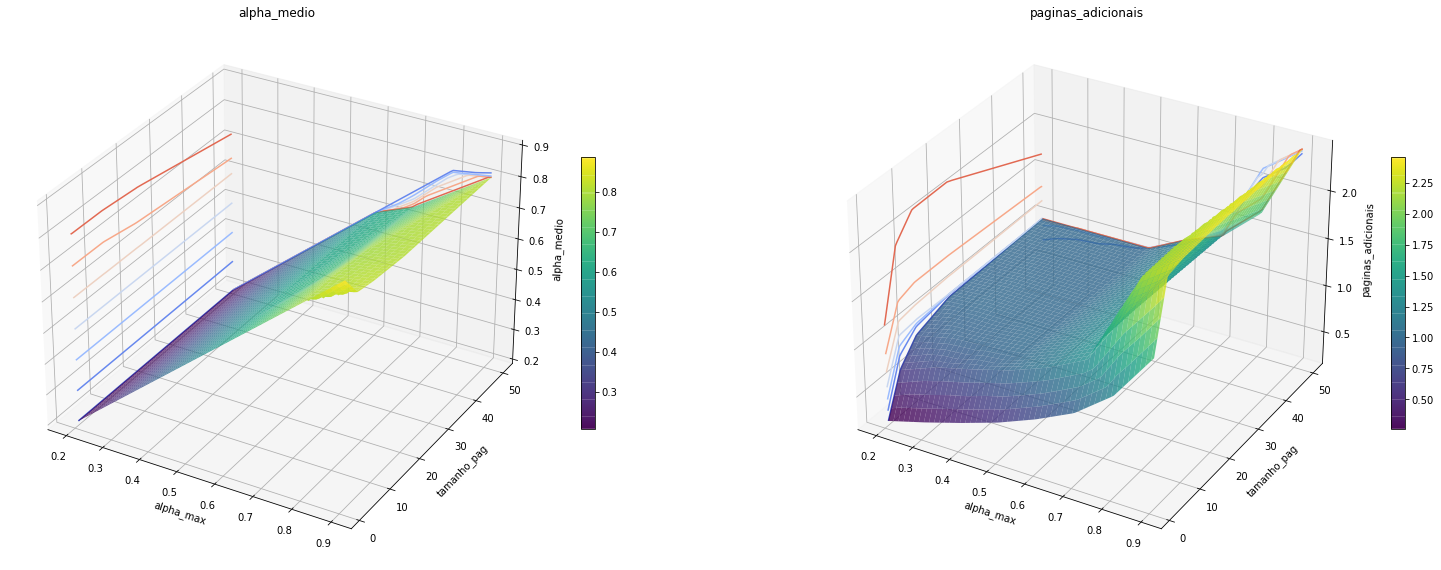

In [4]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(121, projection='3d')
# Remove old colorbars
x = df["alpha_max"]; y = df["tamanho_pag"]; z = df["alpha_medio"]

# Define grid for interpolation
xi = np.linspace(min(x), max(x), 100)
yi = np.linspace(min(y), max(y), 100)
xi, yi = np.meshgrid(xi, yi)


# Interpolate using griddata
zi = griddata((x, y), z, (xi, yi), method='linear')

# Plot the interpolated surface
surf1 = ax1.plot_surface(xi, yi, zi, cmap='viridis',alpha=0.8)

# Add colorbar
fig.colorbar(surf1,shrink = 0.5)




# Add contours on the sides
ax1.contour(xi, yi, zi, zdir='x', offset=min(x), cmap='coolwarm')

ax1.contour(xi, yi, zi, zdir='y', offset=max(y), cmap='coolwarm')


z = df["paginas_adicionais"]
zi = griddata((x, y), z, (xi, yi), method='linear')

ax2 = fig.add_subplot(122, projection='3d')

ax2.contour(xi, yi, zi, zdir='x', offset=min(x), cmap='coolwarm')

ax2.contour(xi, yi, zi, zdir='y', offset=max(y), cmap='coolwarm')

surf2 = ax2.plot_surface(xi, yi, zi, cmap='viridis',alpha=0.8)

fig.colorbar(surf2,shrink=0.5)

# Labeling
ax1.set_xlabel('alpha_max')
ax1.set_ylabel('tamanho_pag')
ax1.set_zlabel('alpha_medio')
ax1.set_title("alpha_medio")

ax2.set_xlabel('alpha_max')
ax2.set_ylabel('tamanho_pag')
ax2.set_zlabel('paginas_adicionais')
ax2.set_title("paginas_adicionais")

plt.subplots_adjust(right=1.5)
# Show plot
plt.show()

In [5]:
def create_graphs(data,axes):
    for i,(x_label,df) in enumerate(data.items()):
        axes[i,0].set_title(f'{x_label} x alpha_medio')
        axes[i,0].plot(df[x_label], df["alpha_medio"])
        axes[i,0].set_xlabel(x_label); axes[i,0].set_ylabel("alpha_medio")

        axes[i,1].set_title(f'{x_label} x paginas_adicionais')
        axes[i,1].plot(df[x_label],df["paginas_adicionais"])
        axes[i,1].set_xlabel(x_label); axes[i,1].set_ylabel("paginas_adicionais")

[]

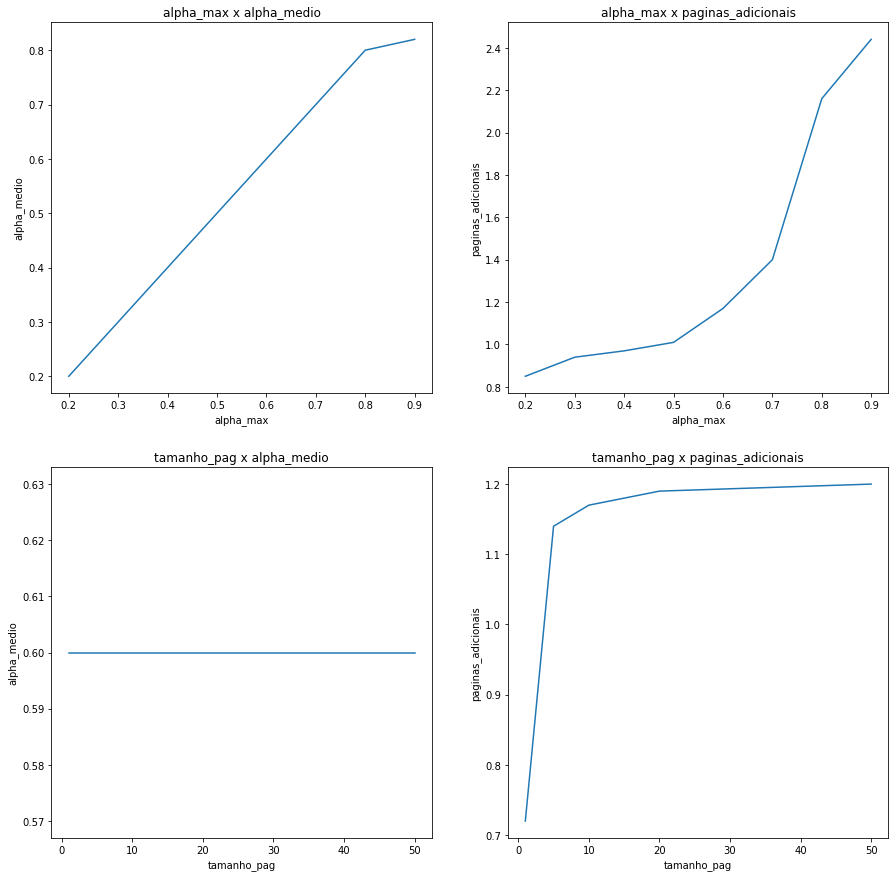

In [6]:
fig,axes = plt.subplots(nrows = 2,ncols = 2,figsize = (15,15))

fixed_alpha_df = df[df["alpha_max"] == 0.6]
fixed_page_df = df[df["tamanho_pag"] == df["tamanho_pag"].median()]

data = {
    "alpha_max":fixed_page_df,
    "tamanho_pag":fixed_alpha_df
}
create_graphs(data,axes)
plt.plot()

In [7]:
from math import ceil
Kc_vector = []


for vec in used_values:
    aux_vector = random.sample(list(vec), ceil(len(vec)*0.2))
    Kc_vector.append(aux_vector)


In [8]:
Ks_vector = []

for vec in used_values:
    aux_vector = []
    index = 0
    while len(aux_vector) < 0.2 * len(vec):
        val = random.randint(1, (P[index] + 1) * 1000000)
        if not (val in vec):
            aux_vector.append(val)
    Ks_vector.append(aux_vector)

In [9]:
C_vector_aux = []
for i in range(0, len(Kc_vector)):
    acc = 0
    for ele in Kc_vector[i]:
        acc += used_hash[i].search(ele)
    C_vector_aux.append(round(acc/len(Kc_vector[i]), 2))

C_vector = []
    
index = 0
while index < 400:
    acc = 0
    for k in range(0, 10):
        acc += C_vector_aux[k + index]
    res = round(acc/10, 2)
    C_vector.append(res)
    index += 10

print(C_vector)

[2.06, 2.12, 2.17, 2.26, 2.37, 2.43, 2.65, 2.84, 1.0, 1.02, 1.04, 1.09, 1.19, 1.28, 1.65, 1.78, 1.0, 1.0, 1.0, 1.01, 1.1, 1.17, 1.58, 1.67, 1.0, 1.0, 1.0, 1.0, 1.07, 1.11, 1.52, 1.59, 1.0, 1.0, 1.0, 1.0, 1.04, 1.06, 1.25, 1.55]


In [10]:
S_vector_aux = []
for i in range(0, len(Ks_vector)):
    acc = 0
    for ele in Ks_vector[i]:
        acc += used_hash[i].search(ele)
    S_vector_aux.append(round(acc/len(Ks_vector[i]), 2))

S_vector = []
    
index = 0
while index < 400:
    acc = 0
    for k in range(0, 10):
        acc += S_vector_aux[k + index]
    res = round(acc/10, 2)
    S_vector.append(res)
    index += 10

print(S_vector)

[1.22, 1.34, 1.44, 1.64, 1.8, 1.93, 2.35, 2.83, 1.0, 1.03, 1.07, 1.14, 1.39, 1.57, 2.31, 2.59, 1.0, 1.01, 1.02, 1.04, 1.33, 1.54, 2.39, 2.55, 1.0, 1.0, 1.0, 1.0, 1.33, 1.51, 2.35, 2.53, 1.0, 1.0, 1.0, 1.0, 1.31, 1.46, 1.9, 2.51]


In [11]:
results2 = {
    "alpha_max":[],
    "tamanho_pag":[],
    "C":[],
    "S":[]
}

index = 0
for p in P:
    for y in alpha_max_values:
        #print(f"{p} {y}")
        results2["alpha_max"].append(y)
        results2["tamanho_pag"].append(p)
        results2["C"].append(C_vector[index])
        results2["S"].append(S_vector[index])
        index += 1

df = pd.DataFrame(results2)
display(df)

,alpha_max,tamanho_pag,C,S
0,0.2,1,2.06,1.22
1,0.3,1,2.12,1.34
2,0.4,1,2.17,1.44
3,0.5,1,2.26,1.64
4,0.6,1,2.37,1.80
5,0.7,1,2.43,1.93
6,0.8,1,2.65,2.35
7,0.9,1,2.84,2.83
8,0.2,5,1.00,1.00
9,0.3,5,1.02,1.03


In [12]:
h = Linear_hashing(page_size=10, m=500, alpha_max=0.85, alpha_min=0.2)
values = np.random.choice(np.arange(1, 1000000), size=10000, replace=False)

alpha_medio_p_iteration = []
p_asterisk_p_iteration = []
L_max = []

for v in values:
    h.insert(v)
    alpha_medio_p_iteration.append(h.get_alpha_medio())
    p_asterisk_p_iteration.append(h.get_p_asterisk())
    L_max.append(h.get_L_max())

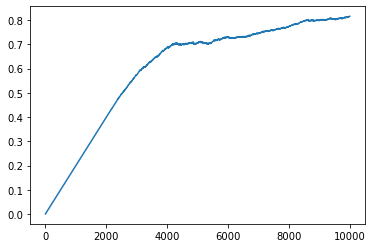

In [13]:
indices = range(0, 10000)

plt.plot(indices, alpha_medio_p_iteration)

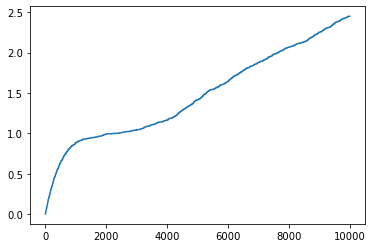

In [14]:
plt.plot(indices, p_asterisk_p_iteration)

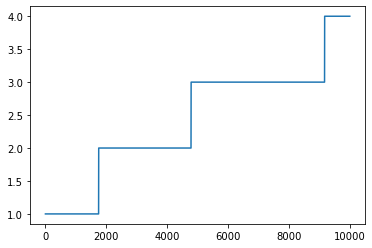

In [15]:
plt.plot(indices, L_max)